### MA3402 Estadística
## Tarea 2, Entrega 3: Test de Chi cuadrado y ANOVA.

**Profesor:** Joaquín Fontbona T.
**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.
**Integrantes:** Gaspar Herreros, Iñaki Ramírez, Francisco Ramírez.

In [ ]:
if(!require(ggplot2)){
    install.packages("ggplot2")
}

library(ggplot2)

Loading required package: ggplot2



El objetivo de esta tarea es poder introducir otros tests de hipótesis o ver ciertos problemas como test de hipótesis con una lógica muy similar a lo visto en la tarea anterior.

### **1. Test de Chi cuadrado (Goodness of Fit)**

El test de Chi cuadrado busca cuantificar que tan bien una distribución se ajusta a otra. En general se tiene una distribución que se ajustó antes y permite hacer predicciones y otra de referencia que es la observada y en general viene dada por datos. 

Tal como el t-test se basaba en un estadístico proveniente de una distribución t-student, este se basa en un estadístico proveniente de una $\chi^2$, de ahí el nombre del test. Este estadístico se calcula como

$$ \chi^2 = \sum \frac{(observado - esperado)^2}{esperado} $$

Entonces esto se plantea como un test de hipótesis como sigue

$$H_0: \text{Lo observado coincide con lo esperado} \, \text{  } \, \text{  v/s  }  \text{  } \, H_1: \text{Lo observado NO coincide con lo esperado} $$

Aplicaremos esto para poder estimar si un subconjunto de la población sigue las mismas proporciones que todo el país en cuanto a contagios de una determinada enfermedad.

### Qué contagioso...

**1.1 Usted posee datos de contagios por edad tanto para un país entero como para una ciudad que corresponde al 10% de todos los contagios del país, aproximadamente. Lea el archivo 'cases.csv', el que contiene los datos separados por edad para todo el país, para la ciudad y además los ratios nacionales, es decir, que porcentaje de los contagios nacionales representa ese grupo etario. Con la función 'chisq.test' utilice los datos de la ciudad como observados y los ratios para plantear un test de $\chi^2$.**

In [ ]:
# Leemos el archivo csv
data <- read.csv("cases.csv")

# Guardamos en un vector los contagios esperados en la ciudad
city.expected.infections <- sum(data$city) * data$ratio

# Guardamos en un vector los contagiados en la ciudad
city.real.infections <- data$city

# Generamos el test
test1 <- chisq.test(city.real.infections,
                    p = city.expected.infections/sum(data$city))

# Mostramos el resultado del test en pantalla
test1


	Chi-squared test for given probabilities

data:  city.real.infections
X-squared = 22.396, df = 6, p-value = 0.001026


In [ ]:
# Guardamos los valores de X-squared, df y p-value
X.squared1 = test1$statistic
df1 = test1$parameter
p.value1 = test1$p.value

# Mostramos los valores de t, df, y p-value en pantalla
print("Estadístico")
X.squared1

print("Grados de libertad")
df1

print("p-value")
p.value1

[1] "Estadístico"


X-squared 
 22.39583

[1] "Grados de libertad"


df 
 6

[1] "p-value"


[1] 0.001026261

**1.2 Por el contrario del estadístico t asociado al t-test, la $\chi^2$ no es simétrica, por lo que los criterios para rechazar o no la hipótesis nula cambian un poco. Sea $X\sim \chi^2_{n-1}$, con $n$ la cantidad de rangos etarios considerados, entonces la hipótesis nula se rechaza si $1-P(X \leq \chi^2) = P(X > \chi^2) < \alpha $, es decir, si el estadístico de interés se ubica más allá del percentil $1-\alpha$. Al valor $P(X > \chi^2)$ se le denota el p-value para el test de chi-cuadrado. En base a lo hecho antes, ¿se rechaza o no la hipótesis nula para $\alpha=0.05$? Calcule el valor del percentil $1-\alpha$ para el valor dado antes y corrobore si su respuesta anterior es correcta o no.**

*Nota: le puede ser de utilidad la función qchisq nativa de R.*


**Respuesta:** 

En primer lugar, notemos que del test hecho, obtuvimos que $\mathrm{p-value}\approx0.001$. Luego, es fácil notar que $0.001<0.05$. Por lo tanto, $\mathrm{p-value}<\alpha$. De esta manera, por lo dicho en el enunciado, se rechaza la hipótesis nula para $\alpha = 0.05$. Esto se puede corroborar calculando el percentil $1-\alpha = 0.95$ de una variable aleatoria $X \sim \chi^2_{6}$, donde el $6$ representa la cantidad de rangos etarios considerados menos 1 (en este caso consideramos $7$ rangos etarios, y por ende la variable aleatoria tiene que tener $6$ grados de libertad). Podemos hacer esto usando la función *qchisq* de **R**. 

In [ ]:
# Definimos alfa
alfa = 0.05

# Calculamos el percentil 1-alfa de la chi cuadrado de 6 grados de libertad
print("Percentil 1-alfa de la chi cuadrado con 5 grados de libertad")
qchisq(df = 6, p = 1-alfa)

[1] "Percentil 1-alfa de la chi cuadrado con 5 grados de libertad"


[1] 12.59159

Así, como vimos en el resultado del test que nuestro estadístico **X-squared** era igual a $22.39$ aproximadamente, entonces como $22.39>12.59$, podemos notar que nuestro estadístico de interés se ubica más allá del percentil $1-\alpha$ de una $\chi^2_{6}$, lo cual nos reafirma que tenemos que rechazar la hipótesis nula para $\alpha=0.05$.

### 2. ANOVA de un solo factor

ANOVA es una abrevación para Analysis of Variance. Lo que busca es poder comparar las medias de distintas poblaciones, cuyas observaciones suponemos de la siguiente forma

$$Y_{ij} = \mu_i + \tau_i + \varepsilon_{ij} $$

Donde $\mu_i$ es la media real de la población $i$, $\tau_i$ es el ruido intrínseco de medir la media para la población $i$ y $\varepsilon_{ij}$ es el ruido intrínseco de cada medición. Entonces, si tenemos $N$ poblaciones con medias $\mu_1, ..., \mu_N$ ANOVA se emplea en la búsqueda de anomalías en alguna de las poblaciones, por tanto se busca descartar que todas las medias sean iguales. Es decir, ANOVA se puede plantear como un test de hipótesis como sigue 

$$H_0: \mu_1 = \mu_2 = ... = \mu_N \, \text{  } \, \text{  v/s  }  \text{  } \, H_1: \exists i,j:\, \mu_i \neq \mu_j $$

Decimos que $\mu_i$ es el factor que afecta directamente a las poblaciones y en esta tarea solo nos pondremos en el caso en que las poblaciones se ven afectadas por un solo factor (de ahí el nombre), hay versiones para más factores pero no lo abordaremos ahora. Al principio puede parecer un poco extraña la formulación, así como en qué contextos podría ser interesante hacer esto; trataremos de aplicar este test en una situación práctica en que ANOVA es de enorme utilidad: las farmacias.

### Hablemos de sustancias

Una farmacéutica es encargada de crear una droga que induce el sueño y es utilizada para calmar la ansiedad. Esta farmacéutica tiene 10 centros de producción de esta droga, los cuáles abastecen distintas farmacias de la ciudad, recibiendo cada farmacia un lote de uno solo de los centros de producción y no existe otro competidor que produzca el mismo principio activo. 

Ocurre que desde hace un tiempo muchos pacientes de un mismo sector vienen reportando que este medicamento ya no les está haciendo el mismo efecto. Esto provoca severos efectos a nivel de ese sector, como una mayor demanda del fármaco. Dado que este medicamento se vende únicamente con orden médica retenida, esto además provoca una saturación de horas médicas en el sector de neurología y trastornos del sueño.

Frente a una posible multa por parte de las autoridades contra la farmacéutica, se le solicita a usted, el encargado de estadística y revisión de lotes de la empresa, que entregue un análisis de lo ocurrido. Es por ello que tiene a su disposición 100 registros de la cantidad de droga medida en los 10 lotes producidos en cada uno de los centros de producción. 

**2.1 Lea el archivo 'lotes.csv' y grafique en forma de *boxplot* los datos para ver las medias de los diferentes lotes, en conjunto con sus quantiles. Simplemente viendo el gráfico, ¿observa que hay un lote anómalo o cuya media es significativamente mayor o menor?**

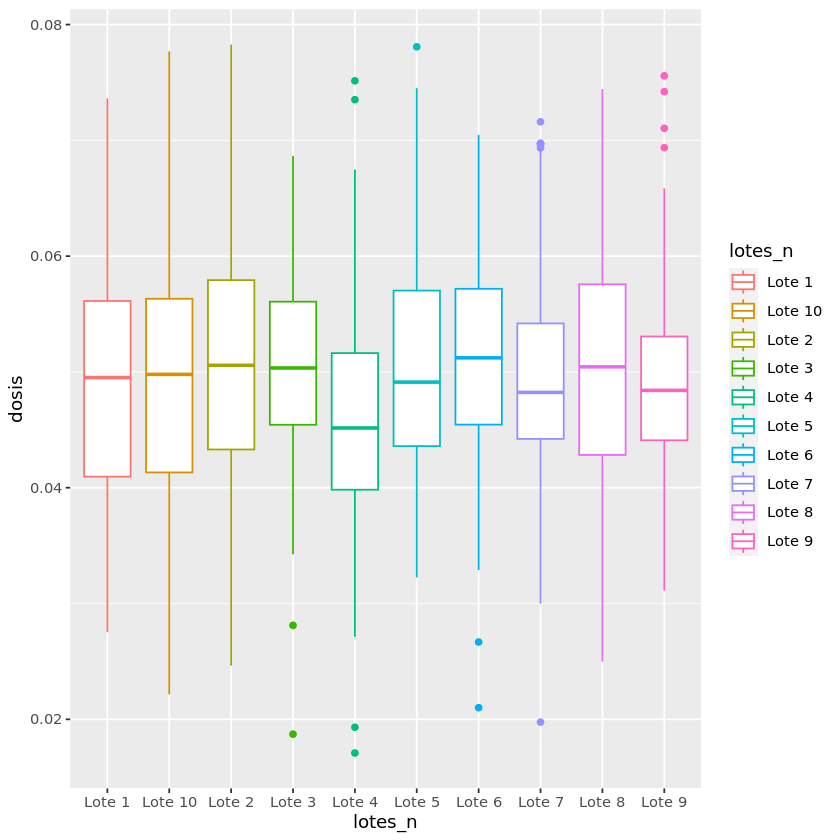

In [ ]:
# Leemos el archivo csv
df <- read.csv("lotes.csv")

# Graficamos en forma de boxplot
ggplot(data = df, aes(x = lotes_n, y = dosis, color = lotes_n)) +
    geom_boxplot() 

**Q:** ¿Observa que hay un lote anómalo o cuya media es significativamente mayor o menor?

**A:** Si, del gráfico mostrado en pantalla se puede ver como claramente el Lote 4 contiene una media significataivamente menor al resto, por lo que éste puede ser considerado anómalo. Todos los demás lotes mantienen una media bastante cercana al $0.05$, mientras que el Lote 4 tiene una media más cercana al $0.045$ que al $0.05$. Al ser la escala tan pequeña puede que no parezca una gran diferencia, pero basta con observar lo poco que fluctúan del $0.05$ los otros lotes para darse cuenta que éste si es anómalo (parecen tener una media de $0.05 \pm 0.002$, no más que eso). 

**2.2 Con la función 'aov' nativa de R, realice un ANOVA que vea la relación entre la dosis de la droga (variable cuantitativa) y los lotes (variable categórica, es decir, que sea un string por ejemplo y no un real).**

*Importante: En R para dar una fórmula entre una variable categórica es importante hacer cuantitativa ~ categórica, en el orden inverso R tira un error. Le puede ser útil buscar la documentación de la función aov.*

In [ ]:
# Realizamos el ANOVA que ve la relación entre las dosis de la droga y los lotes.
anova <- aov(dosis ~ lotes_n, data = df)

# Mostramos el resultado en pantalla
anova

Call:
   aov(formula = dosis ~ lotes_n, data = df)

Terms:
                   lotes_n  Residuals
Sum of Squares  0.00195354 0.09819799
Deg. of Freedom          9        990

Residual standard error: 0.009959412
Estimated effects may be unbalanced

**2.3 Puede obtener gráficos de resumen con la función 'plot' como:**

* **anova <- aov(...)**
* **plot(anova)**

**Interprete brevemente los gráficos obtenidos.**

*Nota: debe ser algo breve, los gráficos muchas veces son complejos y no se espera que entienda la totalidad de todo. Lo de interés de esta pregunta es ver el output de aov y que información interesante puede aportar sobre los datos. No hay una respuesta correcta en esta parte, lo importante son sus comentarios.*

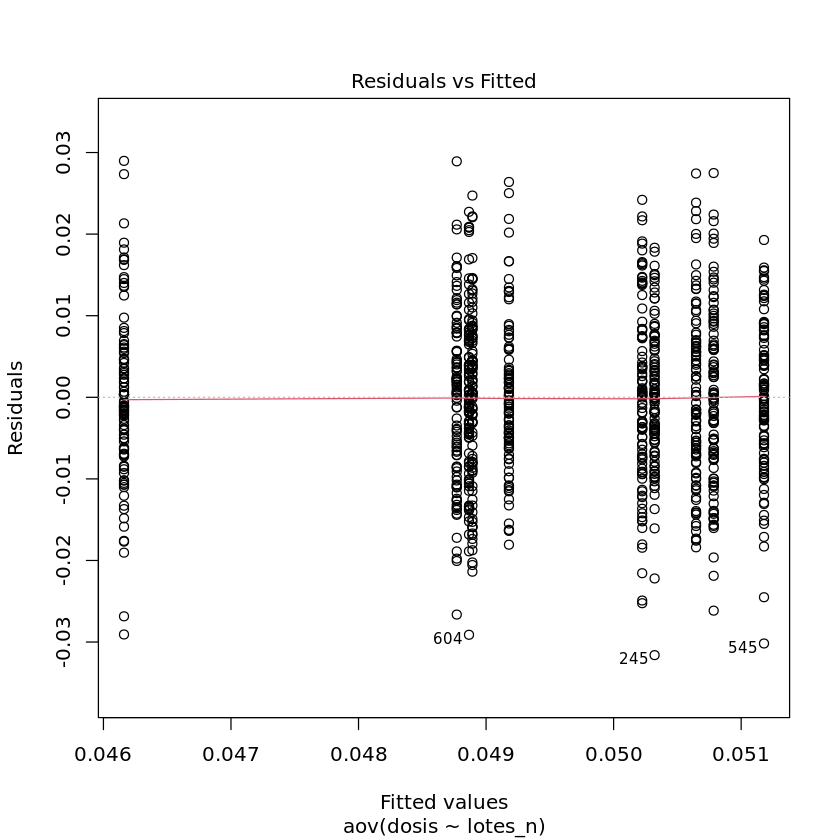

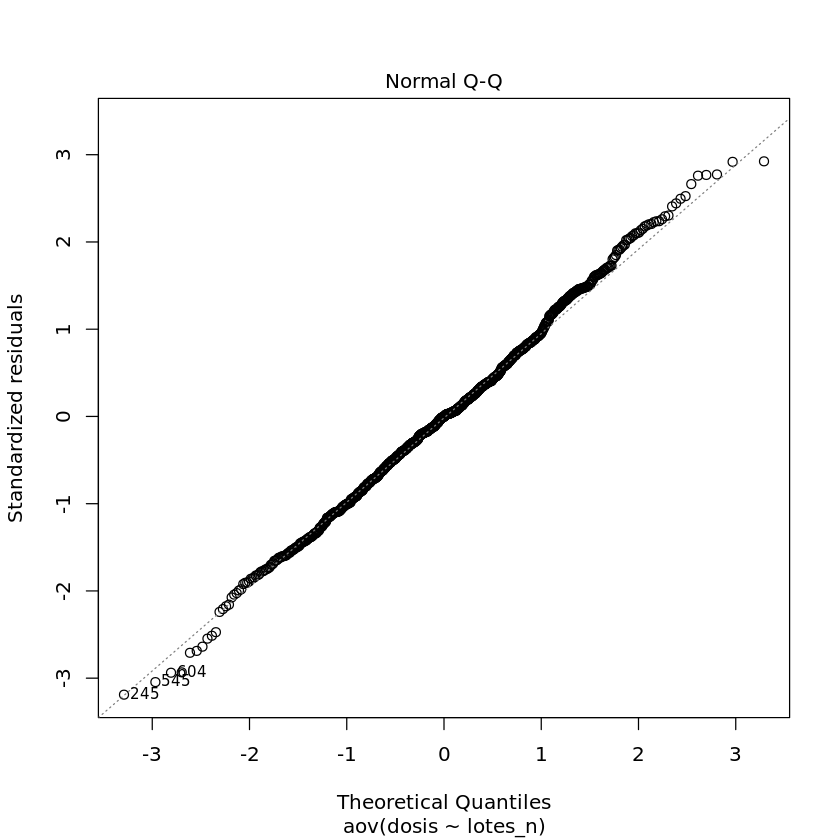

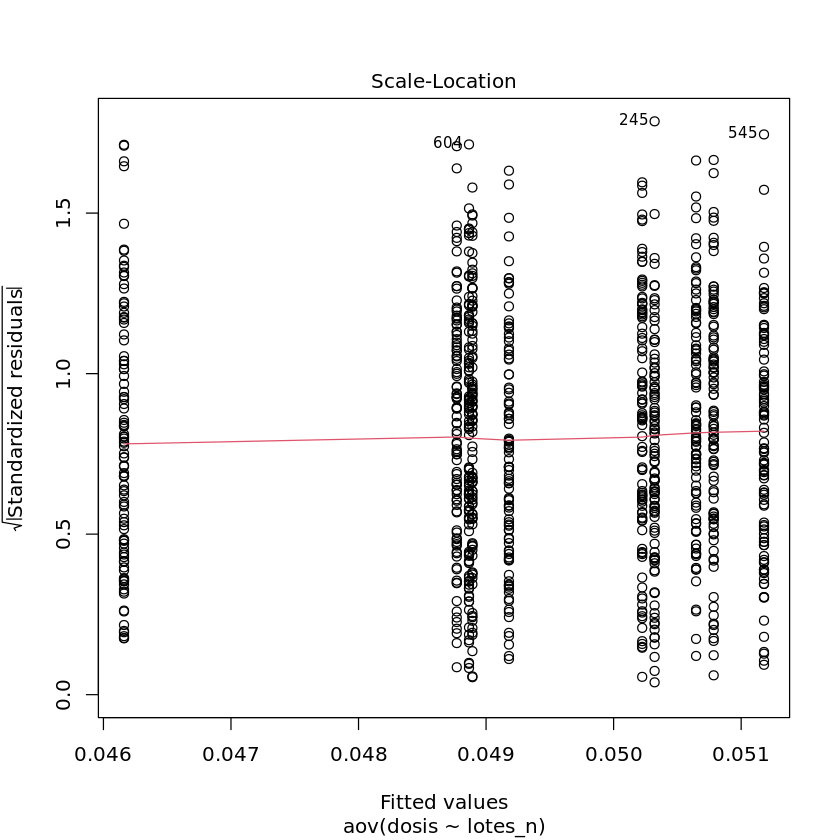

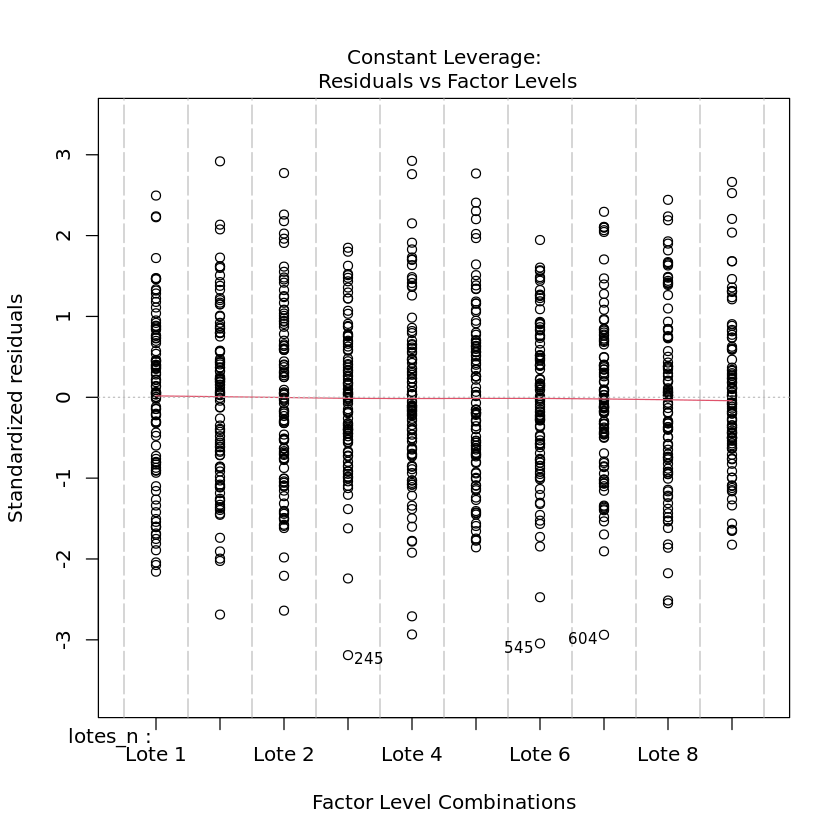

In [ ]:
# Generamos el gráfico resumen
plot(anova)

##### Interpretación:  

Para interpretar los gráficos resultantes, pimero hay que entender a que se refiere en los "ejes y" cuando dice "residuals", que aparece en los 4 gráficos. Los residuals, son la diferencia entre los valores observados y los predichos por el modelo estadístico. Con esto en cuenta procedemos a realizar una breve interpretación de cada gráfico:

1)Este gráfico compara los valores residuales con los datos ajustados (fitted values), los datos ajustados son los predichos por el modelo. Notemos que a medida que se avanza en los valores ajustados, no varían mucho las lineas que se forman. Esto lo interpretamos como que los residuos varian constantemente a lo largo de los valores ajustados.

2)Por lo que entendimos, este gráfico intenta ver la normalidad de los residuos, como la línea es recta, se entiende que los residuos se ajustan de buena manera a una distribución normal.

3)Este es similar al primero, solo que los residuos están estandarizados. Esto puede dar una idea sobre la magnitud relativa de los residuos.

4)Este gráfico se centra en ver si es que hay algún valor atípico en los datos, que pueda influir en la estimación de parámetros del modelo. En nuestro caso, se ve que todos los puntos están relativamente cerca de la línea horizontal, sin nigún dato que destaque por si mismo.

**2.4 Puede obtener un resumen de lo obtenido antes con la función 'summary' (nativa de R también) como:**

* **anova <- aov(...)**
* **summary(anova)**

**Al igual que en el test de chi cuadrado, ANOVA, visto como un test, se basa en una distribución F de Fisher (de hecho, fue Fisher quien propuso este test), que tampoco es simétrica; el estadístico de interés en general se denota F por la Fisher (no explicitaremos su fórmula de cálculo). Sea $X \sim F_{n,k}$ una v.a. con distribución Fisher de $n,k$ grados de libertad, con $n$ la cantidad de lotes y $k$ la cantidad observaciones por cada lote, entonces la hipótesis nula se rechaza si $1-P(X \leq F) = P(X > F) < \alpha$. Al valor $P(X > F)$ se le denota el p-value para ANOVA. En base a esto, ¿se rechaza la hipótesis nula o no para $\alpha=0.05$?**


In [ ]:
# Obttenemos un resumen de lo obtenido con la función 'summary'
summary.anova <- summary(anova)

# Mostramos el resumen en pantalla
summary.anova

# Obtenemos el p-value de la ANOVA
print("p-value de la ANOVA")
summary.anova[[1]]$'Pr(>F)'[1]

             Df  Sum Sq   Mean Sq F value Pr(>F)  
lotes_n       9 0.00195 2.171e-04   2.188 0.0208 *
Residuals   990 0.09820 9.919e-05                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "p-value de la ANOVA"


[1] 0.02075712

Así, obtenemos que para el caso $\alpha=0.05$, se tiene que $\mathrm{p-value}\approx 0.02$. De esta manera, es sencillo concluir que como $0.02<0.05$, entonces $\mathrm{p-value}<\alpha$, y por ende, se rechaza la hipótesis nula para $\alpha=0.05$.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41c4a441-b6a5-415d-9b98-9cd4fe97aabf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>